In [14]:
!pip install mtcnn

In [15]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: c:\users\lenovo\anaconda3\lib\site-packages
Requires: opencv-python, keras
Required-by: keras-facenet


In [16]:
import mtcnn

In [17]:
print(mtcnn.__version__)

0.1.0


In [18]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

1/1 [==============================] - 0s 466ms/step
{'box': [373, 83, 100, 129], 'confidence': 0.9998095035552979, 'keypoints': {'left_eye': (392, 132), 'right_eye': (436, 139), 'nose': (403, 171), 'mouth_left': (390, 171), 'mouth_right': (438, 177)}}
{'box': [185, 68, 91, 118], 'confidence': 0.9993303418159485, 'keypoints': {'left_eye': (208, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


In [19]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

In [20]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

1/1 [==============================] - 0s 394ms/step


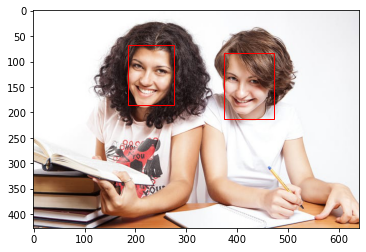

In [21]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [22]:
"""You can draw a circle via the Circle class for the eyes, nose, and mouth."""

from matplotlib.patches import Circle

def draw_image_with_circles(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing circles
    ax = pyplot.gca()
    # plot each circle
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # calculate the center and radius of the circle
        center = (x + width//2, y + height//2)
        radius = width//2
        # create the circle
        circle = Circle(center, radius, fill=False, color='red')
        # draw the circle
        ax.add_patch(circle)
    # show the plot
    pyplot.show()


1/1 [==============================] - 0s 420ms/step


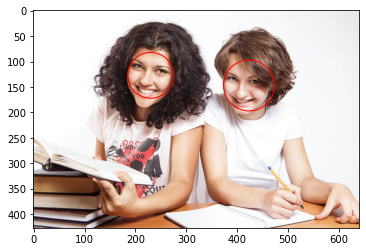

In [23]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display circles around the faces on the original image
draw_image_with_circles(filename, faces)


In [24]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

1/1 [==============================] - 0s 477ms/step


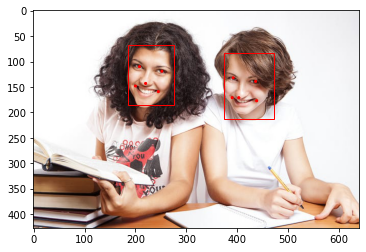

In [25]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

3/3 [==============================] - 0s 40ms/step


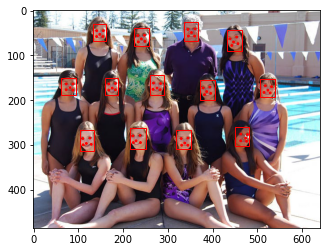

In [26]:
"""You can now try face detection on the test2.jpg photograph."""


filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [27]:
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()

1/1 [==============================] - 0s 377ms/step


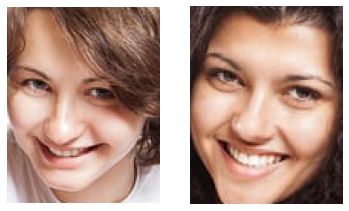

In [28]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

3/3 [==============================] - 1s 32ms/step


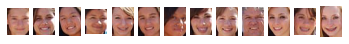

In [29]:
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

# Assignment 1 

In [1]:
import cv2
from mtcnn import MTCNN
import math

# Create an instance of the MTCNN detector
detector = MTCNN()
detector.thresholds = [0.2, 0.2, 0.2]

# Open the video stream
cap = cv2.VideoCapture(0)

# Capture a frame from the webcam
ret, image = cap.read()

# Save the captured image to file
filename = "captured_image.jpg"
cv2.imwrite(filename, image)

# Release the webcam resources
cap.release()

# Load the captured image from file
image = cv2.imread(filename)
image = cv2.resize(image, (640, 480))

# Run the MTCNN detector
results = detector.detect_faces(image)

# Draw circles around the faces
for result in results:
    x, y, width, height = result['box']
    center_x = x + width // 2
    center_y = y + height // 2
    radius = min(width, height) // 2
    cv2.circle(image, (center_x, center_y), radius, (0, 255, 0), 2)

# Display the resulting image
cv2.imshow('image', image)
cv2.waitKey(0)

# Release the resources
cv2.destroyAllWindows()



C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1/1 [==============================] - 0s 310ms/step


# Assignment 2 

In [2]:
import cv2
from mtcnn import MTCNN
import math

# Create an instance of the MTCNN detector
detector = MTCNN()
detector.thresholds = [0.2, 0.2, 0.2]

# Open the video stream
cap = cv2.VideoCapture(0)

# Loop through the frames
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Run the MTCNN detector
    results = detector.detect_faces(frame)

    # Draw circles around the faces
    for result in results:
        x, y, width, height = result['box']
        center_x = x + width // 2
        center_y = y + height // 2
        radius = min(width, height) // 2
        cv2.circle(frame, (center_x, center_y), radius, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('frame', frame)

    # Exit if the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the resources
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 31ms/step


#  Assignment 3



In [32]:
import cv2
from mtcnn import MTCNN

# Load the image
image = cv2.imread("Masks-father-son.jpg")

# Apply histogram equalization to enhance the contrast
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.equalizeHist(image)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Create the MTCNN detector
detector = MTCNN(min_face_size=20)

# Detect the faces in the image
faces = detector.detect_faces(image)

# Draw circles around the faces
for face in faces:
    x, y, width, height = face['box']
    center_x = x + width // 2
    center_y = y + height // 2
    radius = min(width, height) // 2
    cv2.circle(image, (center_x, center_y), radius, (0, 255, 0), 2)

# Display the resulting image
cv2.imshow("Detected Faces", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 [==============================] - 0s 313ms/step
